In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#데이터 가져오기
path = os.path.expanduser('~/data/data/bike-sharing-demand/train.csv')
df = pd.read_csv(path)
train = df.copy()
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
# datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()
train.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

datetime  season  holiday  workingday  weather   temp   atemp  \
5255 2011-12-13 01:00:00       4        0           1        1   8.20  12.880   
5261 2011-12-13 07:00:00       4        0           1        1   6.56   8.335   
980  2011-03-05 07:00:00       1        0           0        2  12.30  13.635   
6816 2012-04-02 08:00:00       2        0           1        1  14.76  16.665   
794  2011-02-16 13:00:00       1        0           1        1  17.22  21.210   

      humidity  windspeed  casual  registered  count  year  month  day  hour  \
5255        80     0.0000       0           4      4  2011     12   13     1   
5261        80    11.0014       2         221    223  2011     12   13     7   
980        100    19.9995       5          10     15  2011      3    5     7   
6816        57    22.0028      36         553    589  2012      4    2     8   
794         30    23.9994      13          80     93  2011      2   16    13   

      minute  second  
5255       0       0  
5261       0       0  
980        0       0  
6816       0       0  
794        0       0

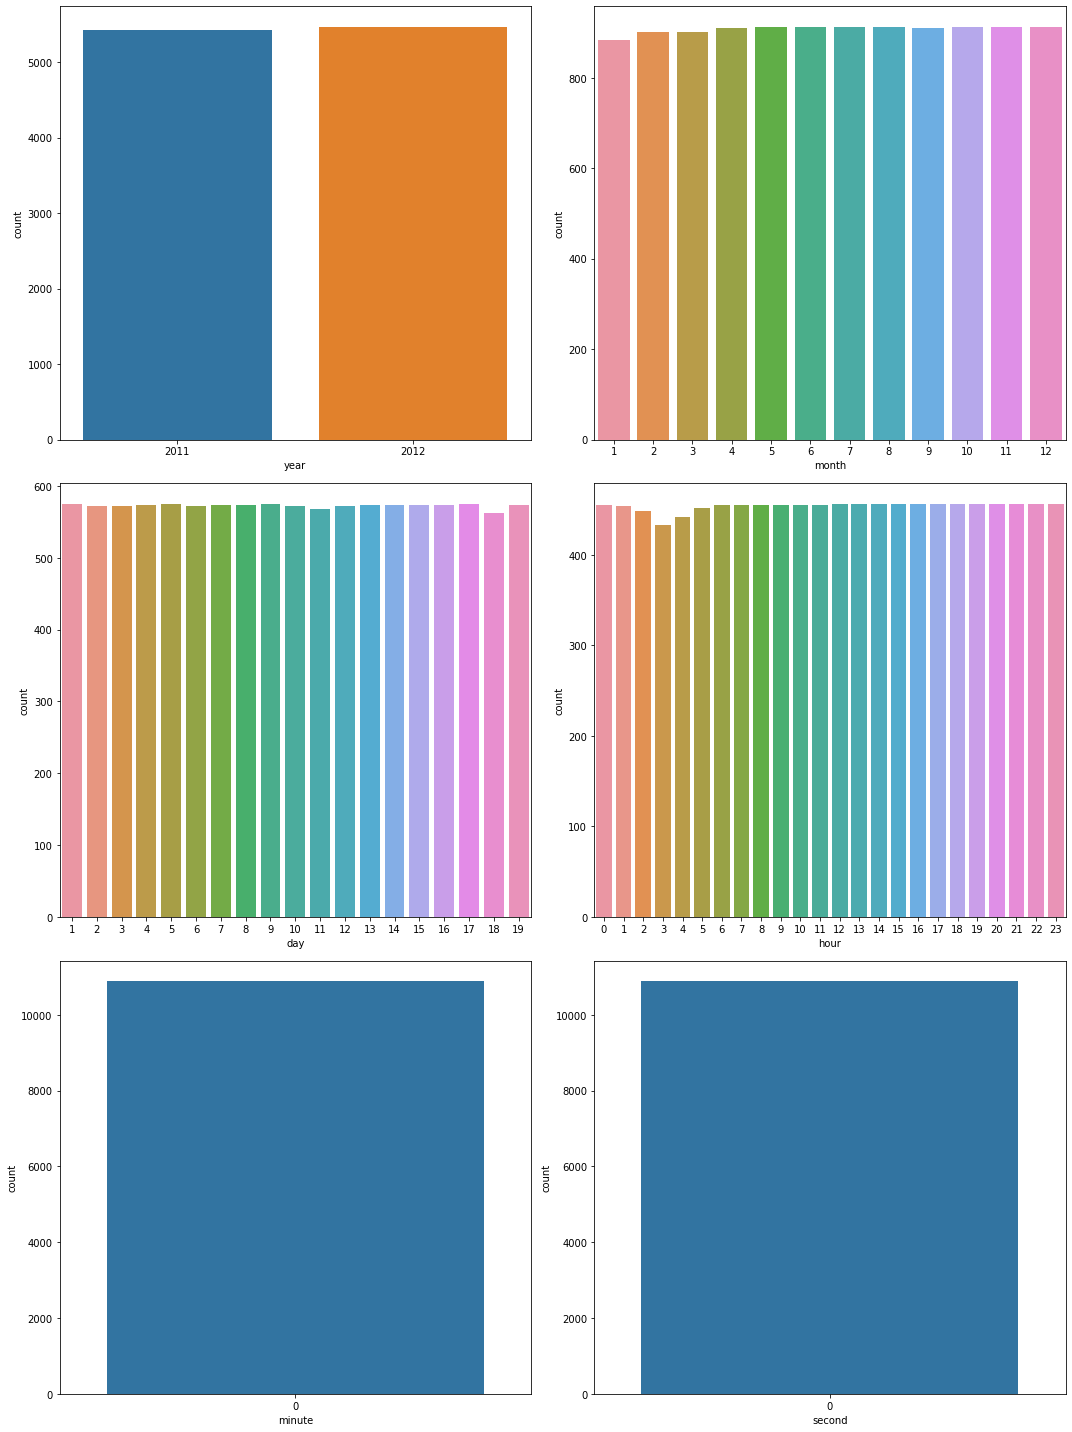

In [4]:
#year, month, day, hour, minute, second 데이터 개수 시각화하기
fig, axes = plt.subplots(3,2, figsize=(15,20))
sns.countplot(x = "year", data = train, ax = axes[0,0])
sns.countplot(x = "month", data = train, ax = axes[0,1])
sns.countplot(x = "day", data = train, ax = axes[1,0])
sns.countplot(x = "hour", data = train, ax = axes[1,1])
sns.countplot(x = "minute", data = train, ax = axes[2,0])
sns.countplot(x = "second", data = train, ax = axes[2,1])

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='windspeed', ylabel='count'>

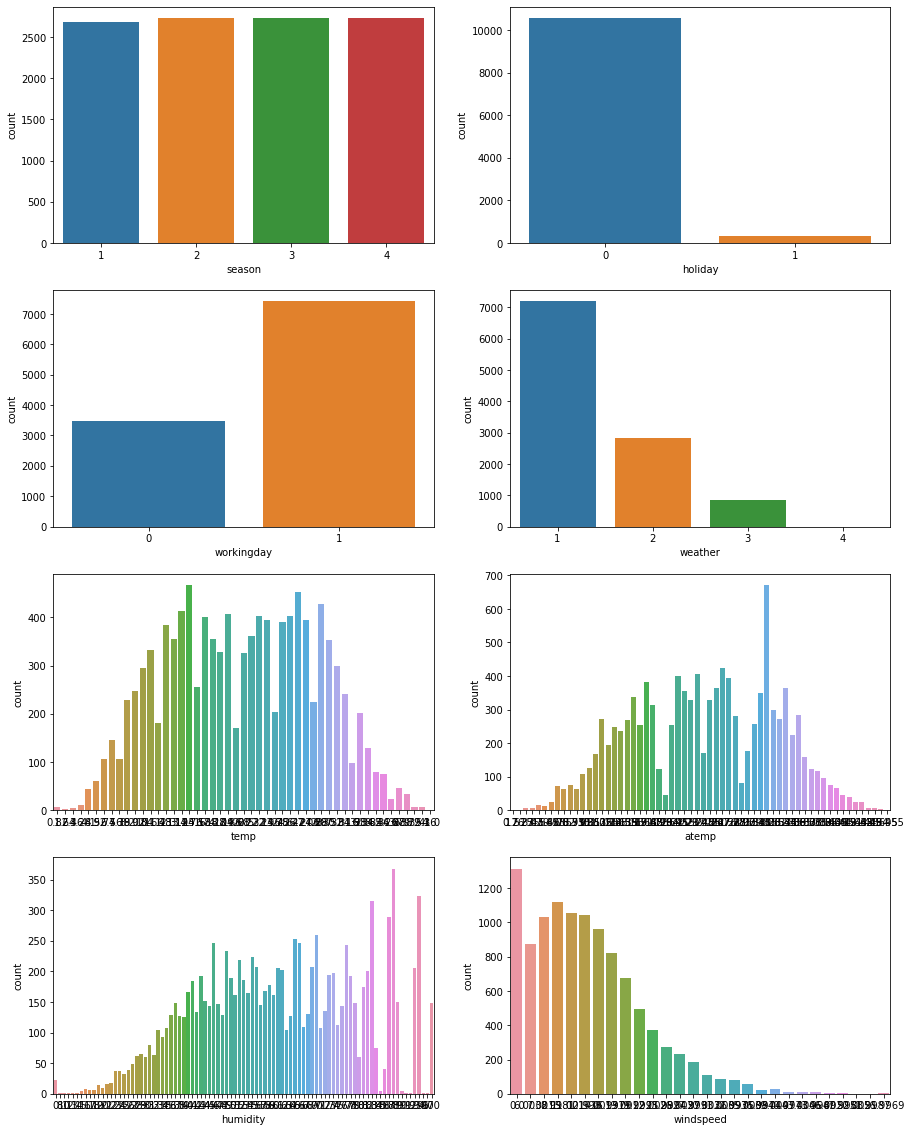

In [5]:
fig, axes = plt.subplots(4,2, figsize=(15,20))
sns.countplot(x = "season", data = train, ax = axes[0,0])
sns.countplot(x = "holiday", data = train, ax = axes[0,1])
sns.countplot(x = "workingday", data = train, ax = axes[1,0])
sns.countplot(x = "weather", data = train, ax = axes[1,1])
sns.countplot(x = "temp", data = train, ax = axes[2,0])
sns.countplot(x = "atemp", data = train, ax = axes[2,1])
sns.countplot(x = "humidity", data = train, ax = axes[3,0])
sns.countplot(x = "windspeed", data = train, ax = axes[3,1])

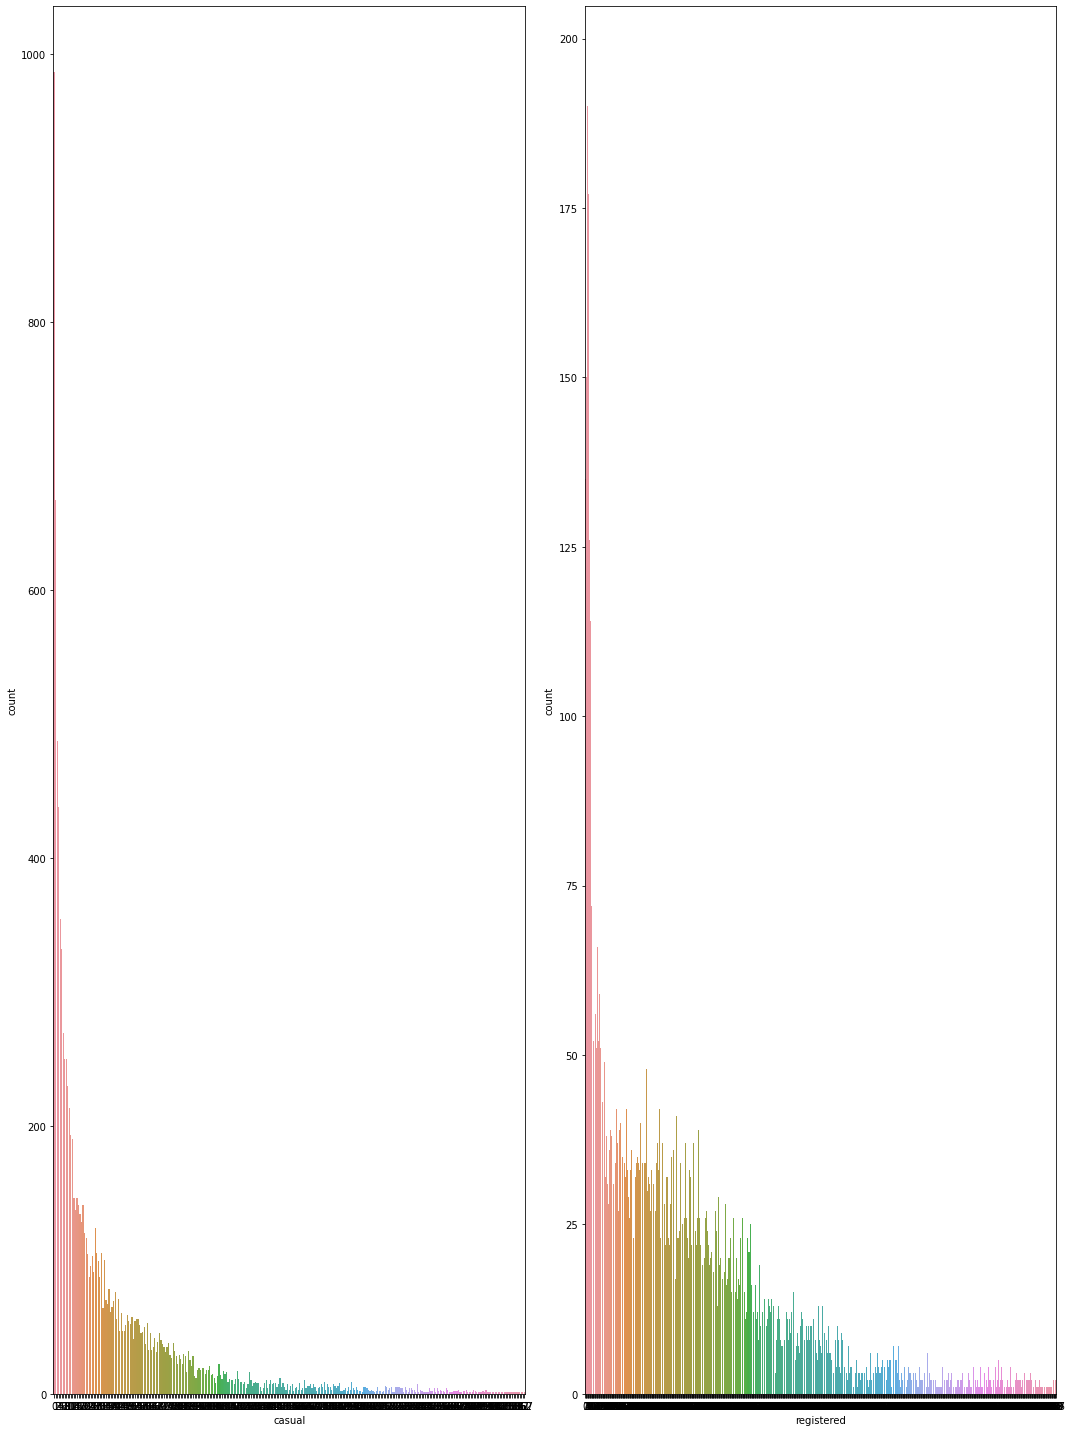

In [6]:
fig, axes = plt.subplots(1,2, figsize = (15,20))
sns.countplot(x = "casual", data = train, ax = axes[0])
sns.countplot(x = "registered", data = train, ax = axes[1])
plt.tight_layout()

<AxesSubplot:>

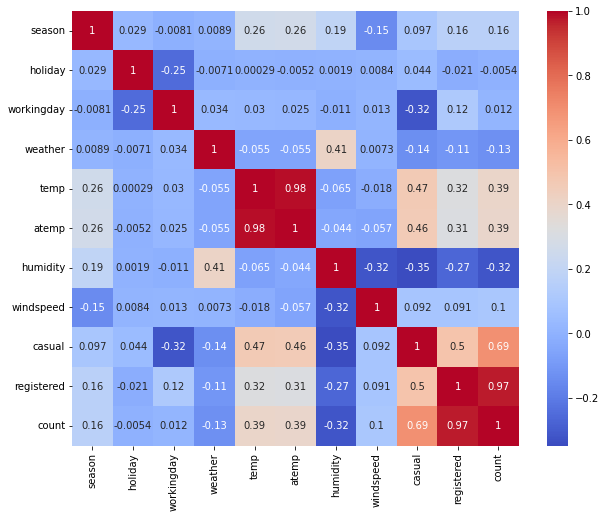

In [7]:
corr = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [8]:
# cout는 registered와 casual의 합이다. 제외
print(df.shape)
print(df[df['registered'] + df['casual'] == df['count']])

(10886, 12)
                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81

In [9]:
# X, y 컬럼 선택 및 train/test 데이터 분리
from sklearn.model_selection import train_test_split
X = train.drop(['count', 'datetime', 'casual', 'count'], axis = 1)
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [10]:
# LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
#학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
from sklearn.metrics import mean_squared_error
prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)

print(mse, rmse)

1099.0707682549225 33.15223624817672


Text(0, 0.5, 'Count')

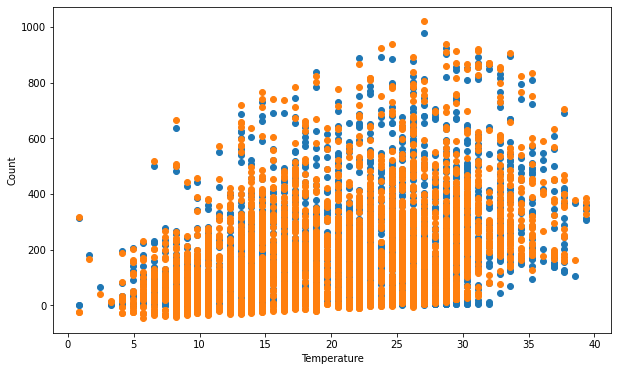

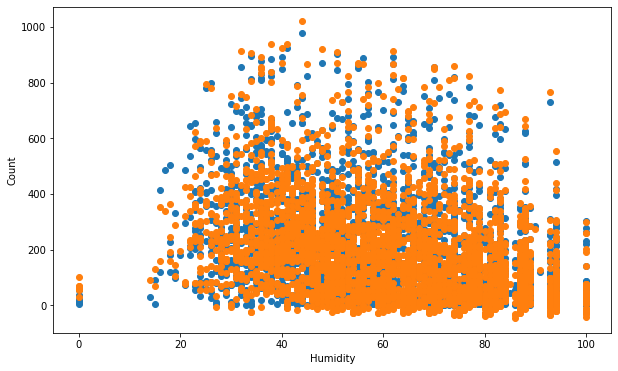

In [12]:
# x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
# 'humidity'와 'count' 간의 관계를 산점도로 시각화
plt.figure(figsize = (10,6))
plt.scatter(X_test['temp'], y_test)
plt.scatter(X_test['temp'], prediction)
plt.xlabel('Temperature')
plt.ylabel('Count')


# 'humidity'와 'count' 간의 관계를 산점도로 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test["humidity"], y_test)
plt.scatter(X_test["humidity"], prediction)

# 그래프 제목과 라벨
plt.xlabel('Humidity')
plt.ylabel('Count')

